In [1]:

from pathlib import Path
import numpy as np
import pandas as pd
import os
from utils import *
from pine_functions import *

In [38]:
ticker = "F"
file = ticker+".csv"
data_path = Path(os.getcwd()).parent # perhaps set to external harddrive to accomodate large amount of data
path = data_path / 'stock price data'/"company stock price daily"/file
stock = pd.read_csv(path)
stock['date'] = pd.to_datetime(stock['date'])
stock = stock.sort_values(by='date').reset_index(drop=True) 
stock

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,Symbol
0,2010-01-04,10.17,10.28,10.0455,10.28,6.316514,60919779,60855800,0.11,1.080000,10.18,"January 04, 10",0.010800,F
1,2010-01-05,10.45,11.24,10.4000,10.96,6.734338,214722305,215620200,0.51,4.880000,10.91,"January 05, 10",0.048800,F
2,2010-01-06,11.21,11.46,11.1300,11.37,6.986260,200023168,200070600,0.16,1.430000,11.30,"January 06, 10",0.014300,F
3,2010-01-07,11.46,11.69,11.3200,11.66,7.164450,130328572,130201700,0.20,1.750000,11.49,"January 07, 10",0.017500,F
4,2010-01-08,11.67,11.74,11.4600,11.69,7.182885,130594848,130463000,0.02,0.171380,11.61,"January 08, 10",0.001714,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,2023-07-05,15.21,15.42,15.1200,15.35,15.350000,52003891,52003900,0.14,0.920450,15.33,"July 05, 23",0.009204,F
3398,2023-07-06,15.17,15.25,14.8800,14.98,14.980000,64914441,64841400,-0.19,-1.250000,14.99,"July 06, 23",-0.012500,F
3399,2023-07-07,14.99,15.24,14.9400,14.98,14.980000,53375490,53344500,-0.01,-0.066711,15.07,"July 07, 23",-0.000667,F
3400,2023-07-10,14.96,15.09,14.8300,15.07,15.070000,51881975,51882000,0.11,0.735290,14.98,"July 10, 23",0.007353,F


In [39]:
stock = pine_ADX_DI(stock)

c:\Users\fuway\OneDrive\桌面\stocks\algo5\pine_functions.py:360: RuntimeWarning:

invalid value encountered in scalar divide



In [40]:

# def pine_stoch_rsi(stock, smoothK=3, smoothD=3, lengthRSI=14, lengthStoch=14):
#     rsi1 = pine_rsi(stock["close"], lengthRSI)
#     for i in range(len(stock)):
#         if i+1 < lengthStoch:
#             continue
#         stock.loc[i, "stoch"] = 100*(rsi1[i]-min(rsi1[i+1-lengthStoch:i+1]))/(max(rsi1[i+1-lengthStoch:i+1])-min(rsi1[i+1-lengthStoch:i+1]))
#     stock["stoch_rsi_k"] = pine_sma(stock["stoch"], smoothK)
#     stock["stoch_rsi_d"] = pine_sma(stock["stoch_rsi_k"], smoothD)
#     return stock
stock = pine_stoch_rsi(stock)

In [41]:
stock["EMA"] = pine_ema(stock["close"], 200)
stock = pine_atr_stoplossfinder(stock)

In [42]:
stock = stock.dropna().reset_index(drop=True)
stock

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,...,DIPlus,DIMinus,DX,ADX,stoch,stoch_rsi_k,stoch_rsi_d,EMA,atr_shortStopLoss,atr_longStopLoss
0,2010-10-18,13.75,13.90,13.64,13.88,8.528521,34950448,34852700,0.13,0.945450,...,30.488174,15.550678,32.445412,29.273656,83.963552,85.948704,87.466351,12.143838,14.385599,13.154401
1,2010-10-19,13.63,13.64,13.18,13.32,8.184433,84594198,84614000,-0.31,-2.270000,...,26.141533,22.702409,7.041044,29.549249,20.506476,61.361866,77.379447,12.155541,14.196149,12.623851
2,2010-10-20,13.45,13.73,13.35,13.64,8.381057,60803422,60800200,0.19,1.410000,...,25.795799,20.829282,10.652028,30.219078,40.159401,48.209810,65.173460,12.170311,14.293505,12.786495
3,2010-10-21,13.78,14.16,13.66,13.81,8.485513,85366030,85365000,0.03,0.217710,...,31.558279,18.719692,25.535213,31.638525,38.735185,33.133687,47.568454,12.186627,14.750567,13.069433
4,2010-10-22,13.86,14.01,13.83,13.95,8.571535,38003970,38003100,0.09,0.649350,...,30.287701,17.966012,25.535213,32.102232,48.560567,42.485051,41.276183,12.204173,14.564246,13.275754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,2023-07-05,15.21,15.42,15.12,15.35,15.350000,52003891,52003900,0.14,0.920450,...,40.691040,11.397427,56.238193,45.547321,100.000000,96.978111,88.930662,13.053138,15.931544,14.608456
3199,2023-07-06,15.17,15.25,14.88,14.98,14.980000,64914441,64841400,-0.19,-1.250000,...,36.966918,15.027773,42.194972,44.973941,26.957107,75.369494,87.486445,13.072311,15.785726,14.344274
3200,2023-07-07,14.99,15.24,14.94,14.98,14.980000,53375490,53344500,-0.01,-0.066711,...,34.778909,14.138304,42.194972,44.346691,26.957107,51.304738,74.550781,13.091293,15.765011,14.414989
3201,2023-07-10,14.96,15.09,14.83,15.07,15.070000,51881975,51882000,0.11,0.735290,...,32.958217,15.612985,35.710939,43.134956,35.155877,29.690030,52.121421,13.110982,15.598134,14.321866


In [43]:
oversell= 20
overbuy=80
stop_loss = 0
stop_gain = 0
stock.loc[:, "order"] = 0
for i in range(1,len(stock)):
    if stock.loc[i-1, "order"] == 1:
        if stock.loc[i, "close"] <= stop_loss or stock.loc[i, "close"] >= stop_gain:
            stock.loc[i, "order"] = 0
            stop_loss = 0
            stop_gain = 0
        else:
            stock.loc[i, "order"] = 1
    elif stock.loc[i-1, "order"] == -1:
        if stock.loc[i, "close"] >= stop_loss or stock.loc[i, "close"] <= stop_gain:
            stock.loc[i, "order"] = 0
            stop_loss = 0
            stop_gain = 0
        else:
            stock.loc[i, "order"] = -1
    else:
        if stock.loc[i,"stoch_rsi_k"] > stock.loc[i,"stoch_rsi_d"] and stock.loc[i-1,"stoch_rsi_k"] < stock.loc[i-1,"stoch_rsi_d"] and stock.loc[i,"stoch_rsi_k"] <= oversell and stock.loc[i, "ADX"] >= 50 and stock.loc[i, "close"] >= stock.loc[i, "EMA"]:
            stock.loc[i,"order"] = 1
            stop_loss = stock.loc[i, "atr_longStopLoss"]
            stop_gain = stock.loc[i,"close"] + stock.loc[i,"close"] - stock.loc[i, "atr_longStopLoss"]
            print(stock.loc[i, "date"], stop_gain, stop_loss)
        elif stock.loc[i,"stoch_rsi_k"] < stock.loc[i,"stoch_rsi_d"] and stock.loc[i-1,"stoch_rsi_k"] > stock.loc[i-1,"stoch_rsi_d"] and stock.loc[i,"stoch_rsi_k"] >= overbuy and stock.loc[i, "ADX"] >= 50 and stock.loc[i, "close"] <= stock.loc[i, "EMA"]:
            stock.loc[i,"order"] = -1
            stop_loss = stock.loc[i, "atr_shortStopLoss"]
            stop_gain = stock.loc[i,"close"] - (-stock.loc[i,"close"] + stock.loc[i, "atr_shortStopLoss"])
            print(stock.loc[i, "date"], stop_gain, stop_loss)
        else:
            stock.loc[i,"order"] = 0
stock

2013-01-28 00:00:00 14.579478888923688 12.98052111107631
2014-10-22 00:00:00 13.388451142250037 14.871548857749964
2018-02-16 00:00:00 9.950769906966295 11.269230093033704
2018-08-09 00:00:00 9.498061468743169 10.321938531256832
2018-08-23 00:00:00 9.312996458984479 9.947003541015523
2020-12-09 00:00:00 9.97138439502455 8.928615604975448
2021-11-22 00:00:00 22.885461437658208 18.074538562341793


,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,...,DIMinus,DX,ADX,stoch,stoch_rsi_k,stoch_rsi_d,EMA,atr_shortStopLoss,atr_longStopLoss,order
0,2010-10-18,13.75,13.90,13.64,13.88,8.528521,34950448,34852700,0.13,0.945450,...,15.550678,32.445412,29.273656,83.963552,85.948704,87.466351,12.143838,14.385599,13.154401,0
1,2010-10-19,13.63,13.64,13.18,13.32,8.184433,84594198,84614000,-0.31,-2.270000,...,22.702409,7.041044,29.549249,20.506476,61.361866,77.379447,12.155541,14.196149,12.623851,0
2,2010-10-20,13.45,13.73,13.35,13.64,8.381057,60803422,60800200,0.19,1.410000,...,20.829282,10.652028,30.219078,40.159401,48.209810,65.173460,12.170311,14.293505,12.786495,0
3,2010-10-21,13.78,14.16,13.66,13.81,8.485513,85366030,85365000,0.03,0.217710,...,18.719692,25.535213,31.638525,38.735185,33.133687,47.568454,12.186627,14.750567,13.069433,0
4,2010-10-22,13.86,14.01,13.83,13.95,8.571535,38003970,38003100,0.09,0.649350,...,17.966012,25.535213,32.102232,48.560567,42.485051,41.276183,12.204173,14.564246,13.275754,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,2023-07-05,15.21,15.42,15.12,15.35,15.350000,52003891,52003900,0.14,0.920450,...,11.397427,56.238193,45.547321,100.000000,96.978111,88.930662,13.053138,15.931544,14.608456,0
3199,2023-07-06,15.17,15.25,14.88,14.98,14.980000,64914441,64841400,-0.19,-1.250000,...,15.027773,42.194972,44.973941,26.957107,75.369494,87.486445,13.072311,15.785726,14.344274,0
3200,2023-07-07,14.99,15.24,14.94,14.98,14.980000,53375490,53344500,-0.01,-0.066711,...,14.138304,42.194972,44.346691,26.957107,51.304738,74.550781,13.091293,15.765011,14.414989,0
3201,2023-07-10,14.96,15.09,14.83,15.07,15.070000,51881975,51882000,0.11,0.735290,...,15.612985,35.710939,43.134956,35.155877,29.690030,52.121421,13.110982,15.598134,14.321866,0


In [44]:
stock[stock["order"]!=0][0:20]

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,...,DIMinus,DX,ADX,stoch,stoch_rsi_k,stoch_rsi_d,EMA,atr_shortStopLoss,atr_longStopLoss,order
572,2013-01-28,13.4900,13.8200,13.42,13.78,8.688696,51196749,51189300,0.2900,2.150000,...,19.752517,15.007805,53.875305,8.212905,2.737635,2.412341,11.347372,14.259479,12.980521,1
573,2013-01-29,13.5599,13.6087,12.89,13.14,8.285156,131149458,131146500,-0.4199,-3.100000,...,27.188262,11.147848,50.799868,0.000000,2.737635,1.825090,11.365209,14.160119,12.338581,1
1010,2014-10-22,14.2900,14.3300,14.08,14.13,9.289641,24285623,24285200,-0.1600,-1.120000,...,31.508549,35.095976,63.475894,91.522958,97.174319,99.058106,16.102428,14.871549,13.538451,-1
1011,2014-10-23,14.3000,14.4900,14.28,14.40,9.467152,30418499,30418400,0.1000,0.699300,...,29.250497,25.840028,60.333299,100.000000,97.174319,98.116213,16.085488,15.031355,13.738645,-1
1012,2014-10-24,14.4100,14.4400,13.65,13.78,9.059538,91944605,91944000,-0.6300,-4.370000,...,36.564007,42.535044,58.414926,68.670009,86.730989,93.693209,16.062548,15.061811,13.028189,-1
1013,2014-10-27,13.8700,13.8900,13.68,13.82,9.085834,61472293,61472200,-0.0500,-0.360490,...,35.108368,42.535044,56.141509,72.025300,80.231770,88.045693,16.040234,14.473459,13.096541,-1
1014,2014-10-28,13.8900,14.1600,13.86,14.16,9.309364,36821984,36821800,0.2700,1.940000,...,32.829554,28.191125,52.549151,98.917727,79.871012,82.277924,16.021525,14.734277,13.285723,-1
1015,2014-10-29,14.1400,14.1800,13.76,13.91,9.226451,31265038,31263900,-0.2300,-1.630000,...,32.112598,30.962235,49.154729,86.317724,85.753584,81.952122,16.000515,14.761242,13.178758,-1
1016,2014-10-30,13.8800,13.9650,13.68,13.95,9.252982,25506196,25506000,0.0700,0.504320,...,31.890684,33.183667,45.762350,89.442866,91.559439,85.728012,15.980112,14.527025,13.117975,-1
1017,2014-10-31,14.1300,14.1500,14.04,14.09,9.345848,37278419,37277800,-0.0400,-0.283090,...,30.620333,23.302998,41.664209,100.000000,91.920197,89.744407,15.961305,14.679272,13.510728,-1


Total Trades: 7
Average Win: 15.62%
Average Lose: 4.45%
Maximum Drawdown: 9.46%
ROI: 5.69%
ROI with no strategy: 9.73%
Compounding Annual Return: 0.44%
Win-Loss Ratio: 28.57%
Profit-Loss Ratio: 1.274784083598684
Annual Variance: 0.0033062769847904275
Annual Standard Deviation: 0.05750023464987276
Sharpe Ratio: 0.0454
Strategy Beta with Benchmark DOW JONES: 1.0012
Benchmark DOW JONES ROI: 207.45%
Benchmark DOW JONES ROI Following Strategy: -0.13%
Strategy Beta with Benchmark S&P 500: 1.0850
Benchmark S&P 500 ROI: 274.71%
Benchmark S&P 500 ROI Following Strategy: -1.58%
Strategy Beta with Benchmark NASDAQ: 0.7674
Benchmark NASDAQ ROI: 454.72%
Benchmark NASDAQ ROI Following Strategy: -7.75%
Strategy Beta with Benchmark Russell 2000: 0.6916
Benchmark Russell 2000 ROI: 169.44%
Benchmark Russell 2000 ROI Following Strategy: -9.00%


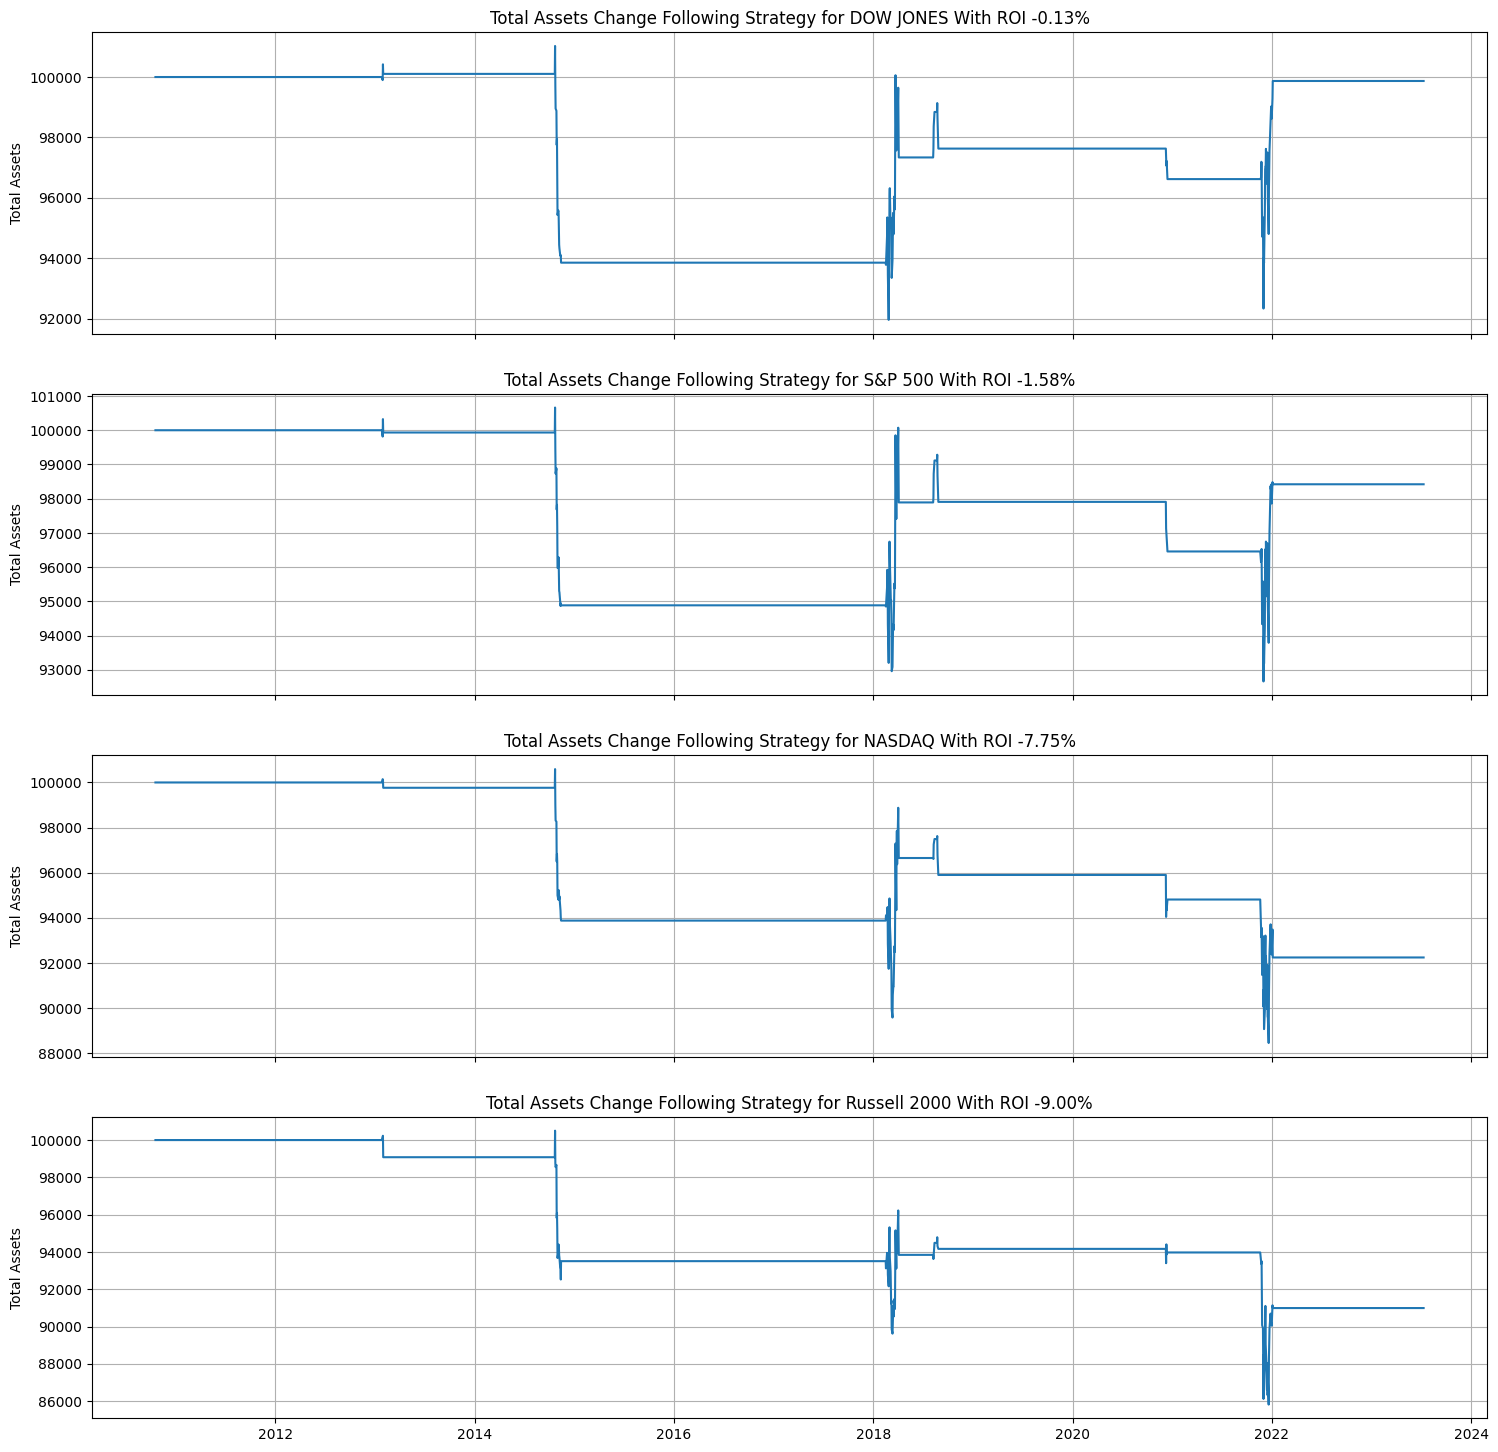

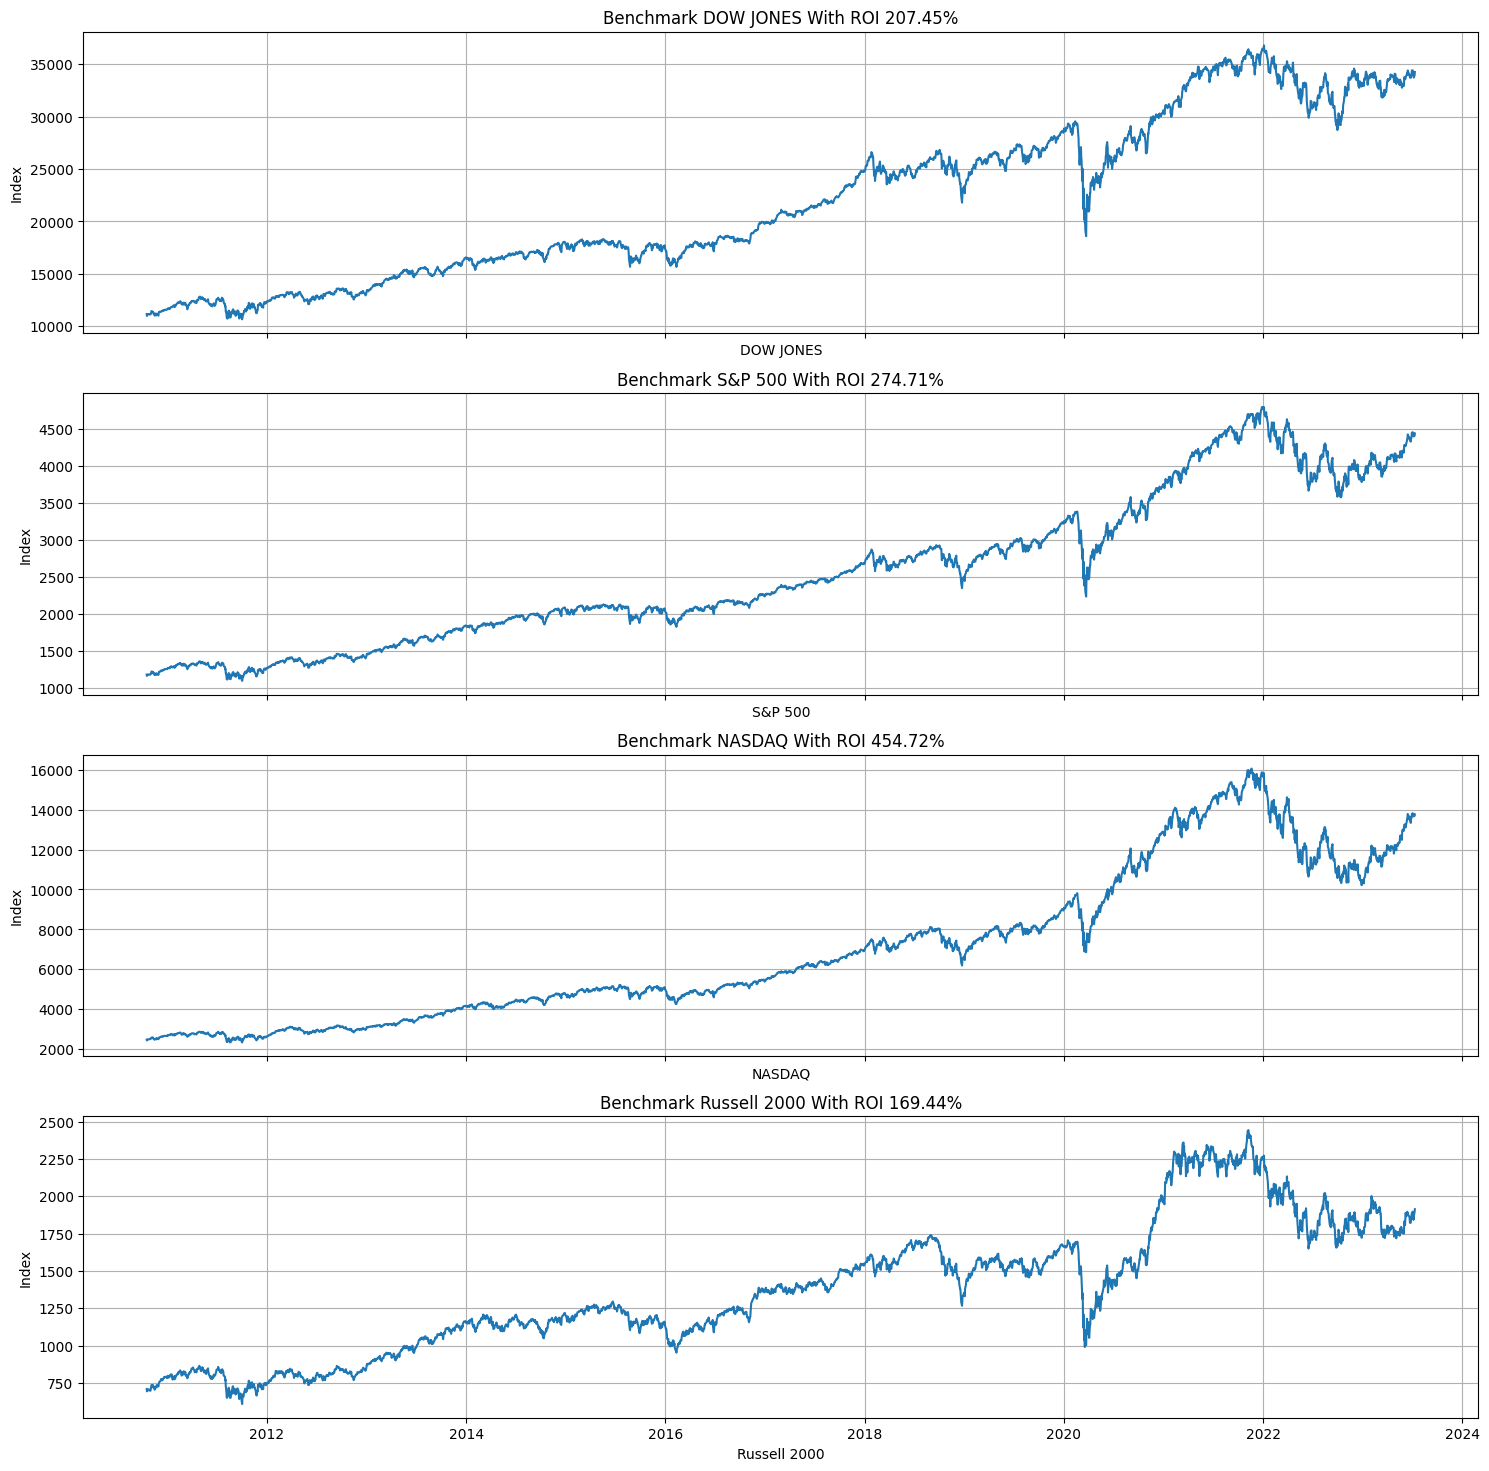

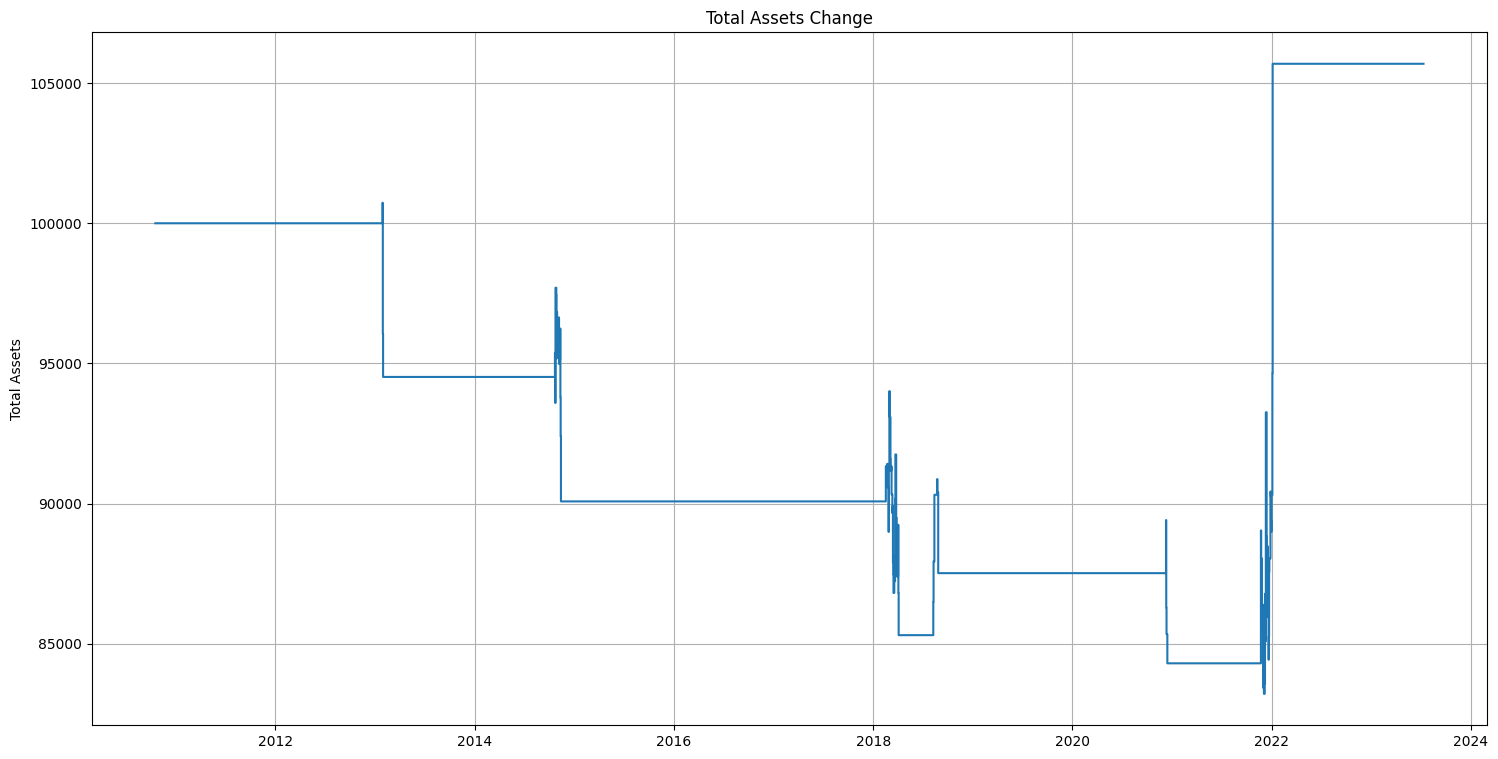

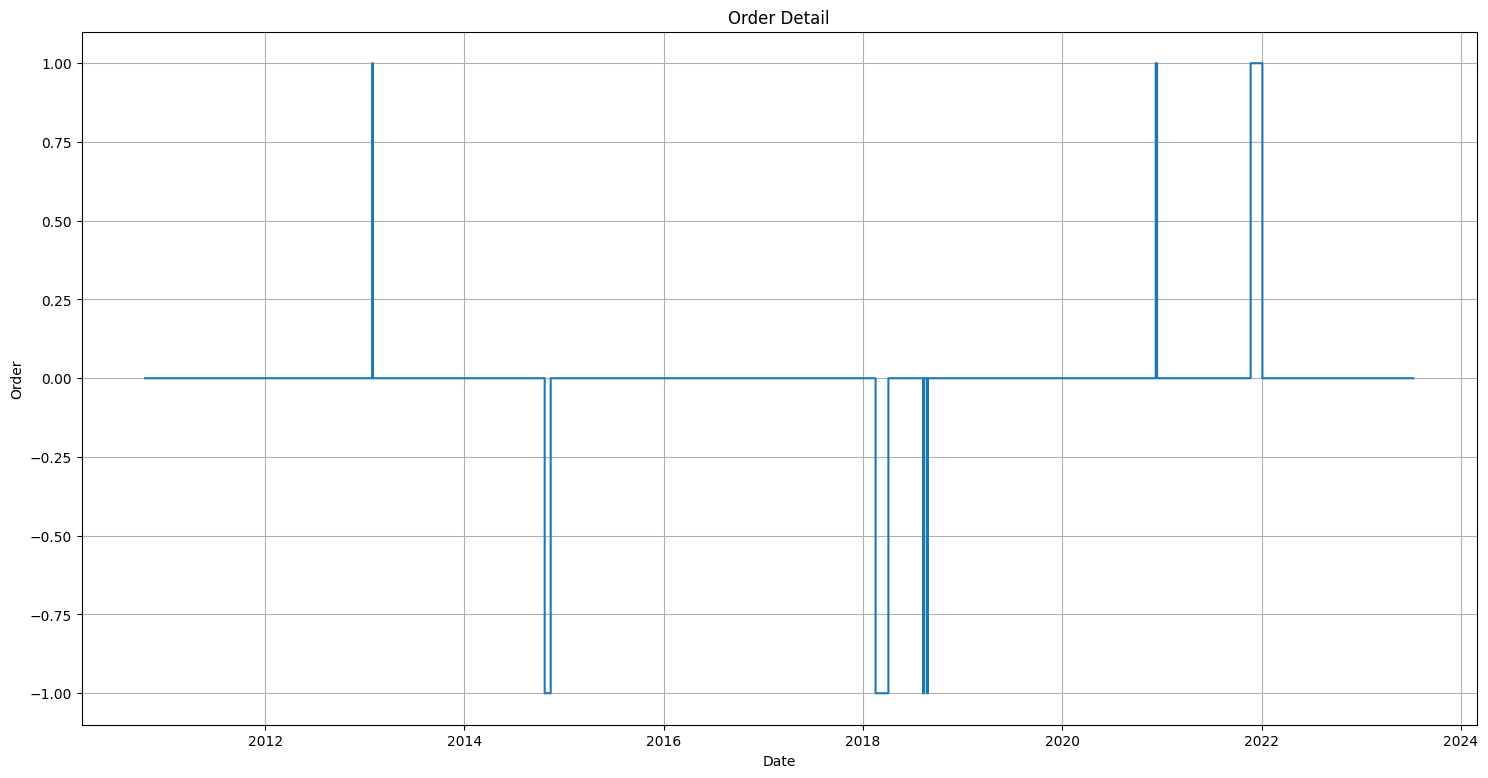

In [45]:
eval(stock, ticker="AAPL", variables={})

In [5]:

# stop_loss_price = False
# stop_loss=False
# stop_gain=False
# buy_price = False
long_range = 30
oversell=30
overbuy=70
midline_buy = 40
midline_sell = 60
day_max = 11

day_count = 0
long_in = 0
short_in = 0
long_out = 0
short_out = 0
stock.loc[:, "order"] = 0
for i in range(1,len(stock)):
    stock.loc[i,"long_trend"] = (stock.loc[i,"sma"] > stock.loc[i-1,"sma"])
    stock.loc[i,"short_trend"] = (stock.loc[i,"sma"] < stock.loc[i-1,"sma"])
    if i <= long_range:
        stock.loc[i, "order"] = 0
    else:
        if long_in == 1:
            stock.loc[i, "order"] = 1
            day_count+=1
            long_in = 0
            if stock.loc[i, "rsi"] >= midline_buy:
                long_out = 1
        elif short_in ==1:
            stock.loc[i, "order"] = -1
            day_count+=1
            short_in = 0
            if stock.loc[i, "rsi"] <= midline_sell:
                short_out = 1
        elif long_out == 1:
            stock.loc[i, "order"] = 0
            day_count = 0
            long_out = 0
        elif short_out == 1:
            stock.loc[i, "order"] = 0
            day_count = 0
            short_out = 0
        elif stock.loc[i-1, "order"] == 1:
            if stock.loc[i, "rsi"] >= midline_buy or day_count >= day_max:
                long_out = 1
            stock.loc[i, "order"] = stock.loc[i-1, "order"]
            day_count+=1
        elif stock.loc[i-1, "order"] == -1:
            if stock.loc[i, "rsi"] <= midline_sell or day_count >= day_max:
                short_out = 1
            stock.loc[i, "order"] = stock.loc[i-1, "order"]
            day_count+=1
        # elif stock.loc[i, "close"] >= stock.loc[i,"sma"]:
        elif sum(stock.loc[i-long_range:i, "close"] >= stock.loc[i,"sma"])/long_range >= 0.5 and sum(stock.loc[i-long_range:i,"long_trend"]) >= long_range:
            if stock.loc[i, "rsi"] <= oversell:
                long_in = 1
            stock.loc[i,"order"] = 0
        # elif stock.loc[i, "close"] <= stock.loc[i,"sma"]:
        elif sum(stock.loc[i-long_range:i, "close"] <= stock.loc[i,"sma"])/long_range >= 0.5 and sum(stock.loc[i-long_range:i,"short_trend"]) >= long_range:
            if stock.loc[i, "rsi"] >= overbuy:
                short_in = 1
            stock.loc[i, "order"] = 0
        else:
            stock.loc[i,"order"] = 0
            day_count=0

In [6]:
stock["order"].value_counts()

order
 0    3009
 1     103
-1      91
Name: count, dtype: int64

In [7]:
eval(stock, ticker, {}, opt=True)

(0.10975042629049764, 0.4944256722300898, 0.6216216216216216)

In [8]:

# perhaps set to external harddrive to accomodate large amount of data
data_path = Path(os.getcwd()).parent
buy_orders = []
sell_orders = []
current_order = None
money = 100000
short = None
long = None

for index, row in stock.iterrows():
    if row['order'] > 0:
        if current_order is None and short is None:
            current_order = {"Initial Money": money, 'Buy Date': row['date'], 'Buy Price': stock.loc[index, 'open'], "Shares Purchased": money/stock.loc[index, 'open'], "long/short": "long"}
            long = True
        elif current_order is not None and short is not None:
            current_order['Sell Date'] = row['date']
            current_order['Sell Price'] = row['open']
            current_order["Price Change"] = current_order["Sell Price"] - \
                current_order["Buy Price"]
            current_order["Profit"] = current_order["Price Change"] * \
                current_order["Shares Purchased"] * -1
            current_order["Money After Order"] = current_order["Shares Purchased"] * \
                current_order['Buy Price'] + current_order["Profit"]
            money = current_order["Money After Order"]
            sell_orders.append(current_order)
            short = None
            current_order = {"Initial Money": money, 'Buy Date': row['date'], 'Buy Price': row[
                'open'], "Shares Purchased": money/row['open'], "long/short": "long"}
            long = True
        else:
            continue
    elif row['order'] < 0:
        if current_order is None and long is None:
            current_order = {"Initial Money": money, 'Buy Date': row['date'], 'Buy Price': stock.loc[index, 'open'], "Shares Purchased": money/stock.loc[index, 'open'], "long/short": "short"}
            short = True
        elif current_order is not None and long is not None:
            current_order['Sell Date'] = row['date']
            current_order['Sell Price'] = row['open']
            current_order["Price Change"] = current_order["Sell Price"] - \
                current_order["Buy Price"]
            current_order["Profit"] = current_order["Price Change"] * \
                current_order["Shares Purchased"]
            current_order["Money After Order"] = current_order["Shares Purchased"] * \
                current_order['Buy Price'] + current_order["Profit"]
            money = current_order["Money After Order"]
            sell_orders.append(current_order)
            long = None
            current_order = {"Initial Money": money, 'Buy Date': row['date'], 'Buy Price': row[
                'open'], "Shares Purchased": money/row['open'], "long/short": "short"}
            short = True
        else:
            continue
    elif row['order'] == 0:
        if current_order is not None:
            current_order['Sell Date'] = row['date']
            current_order['Sell Price'] = row['open']
            current_order["Price Change"] = current_order["Sell Price"] - \
                current_order["Buy Price"]
            if current_order['long/short'] == "short":
                current_order["Profit"] = current_order["Price Change"] * \
                    current_order["Shares Purchased"] * -1
            elif current_order['long/short'] == "long":
                current_order["Profit"] = current_order["Price Change"] * \
                    current_order["Shares Purchased"]
            current_order["Money After Order"] = current_order["Shares Purchased"] * \
                current_order['Buy Price'] + current_order["Profit"]
            money = current_order["Money After Order"]
            sell_orders.append(current_order)
            current_order = None
            long = None
            short = None

# Create a new DataFrame for buy and sell orders
orders_df = pd.DataFrame(buy_orders + sell_orders)

# maximum drawdown
peak_value = None
maximum_drawdown = 0.0

for index, row in stock.iterrows():
    if row['order'] == 1:
        if peak_value is None:
            peak_value = row['open']
        elif row['open'] > peak_value:
            peak_value = row['open']
        else:
            drawdown = (peak_value - row['open']) / peak_value
            if drawdown > maximum_drawdown:
                maximum_drawdown = drawdown
    if row['order'] == -1:
        if peak_value is None:
            peak_value = row['open']
        elif row['open'] < peak_value:
            peak_value = row['open']
        else:
            drawdown = (row['open'] - peak_value) / peak_value
            if drawdown > maximum_drawdown:
                maximum_drawdown = drawdown
    elif row['order'] == 0:
        # If 'order_column' is 0, reset peak and trough values
        peak_value = None

# ROI
ROI = (orders_df.loc[len(orders_df)-1, "Money After Order"] -
    orders_df.loc[0, "Initial Money"])/orders_df.loc[0, "Initial Money"]
# print(f"ROI: {ROI * 100:.2f}%")
ROI_noStrategy = (stock.loc[len(stock)-1, "close"] -
                stock.loc[0, "close"]) / stock.loc[0, "close"]
# print(f"ROI with no strategy: {ROI_noStrategy * 100:.2f}%")

# Win-Loss Ratio
win_loss_ratio = (orders_df['Profit'] > 0).sum()/len(orders_df) * 100
# print(f"Win-Loss Ratio: {win_loss_ratio:.2f}%")
# Reset the index of the new DataFrame
orders_df.reset_index(drop=True, inplace=True)
# Total Trades
print("Total Trades: {}".format(len(orders_df)))

# Average Win
winning = orders_df[orders_df["Profit"] > 0]
print(
    f"Average Win: {abs(winning['Price Change']/winning['Buy Price']).mean() * 100:.2f}%")

# Average Lose
losing = orders_df[orders_df["Profit"] <= 0]
print(
    f"Average Lose: {abs(losing['Price Change']/losing['Buy Price']).mean() * 100:.2f}%")

# Maximum Drawdown is now stored in 'maximum_drawdown'
print(f"Maximum Drawdown: {maximum_drawdown * 100:.2f}%")

# ROI
print(f"ROI: {ROI * 100:.2f}%")
print(f"ROI with no strategy: {ROI_noStrategy * 100:.2f}%")

# Compounding Annual Return
years = (stock["date"].max()-stock["date"].min()).days/365
print(
    f"Compounding Annual Return: {((orders_df.loc[len(orders_df)-1, 'Money After Order']/orders_df.loc[0, 'Initial Money']) ** (1/years) - 1) * 100:.2f}%")

# Win-Loss Ratio
print(f"Win-Loss Ratio: {win_loss_ratio:.2f}%")
# Profit-Loss Ratio
print(
    f"Profit-Loss Ratio: {winning['Profit'].sum()/-losing['Profit'].sum()}")

# Annual Variance
stock['daily_returns'] = stock['order'] * \
    (stock['close'] / stock['close'].shift(1) - 1)
variance_daily = np.var(stock['daily_returns'].dropna())
# Specify the number of trading days in a year (e.g., 252 for U.S. markets)
trading_days_per_year = 252
# Annualize the variance by multiplying by the number of trading days in a year
variance_annualized = variance_daily * trading_days_per_year
print("Annual Variance: {}".format(variance_annualized))

# Annual Standard Deviation
print("Annual Standard Deviation: {}".format(
    np.sqrt(variance_annualized)))

# Sharoe Ratio
# Calculate the average daily return
average_daily_return = stock['daily_returns'].mean()
# Calculate the daily risk-free rate
annual_rate = 0.04
daily_risk_free_rate = (
    1 + annual_rate) ** (1/trading_days_per_year) - 1
# Calculate the daily excess return
stock['daily_excess_return'] = stock['daily_returns'] - \
    daily_risk_free_rate
# Calculate the standard deviation of daily excess returns as the measure of risk
std_dev_daily_excess_returns = stock['daily_excess_return'].std()
# Calculate the annualized Sharpe Ratio
sharpe_ratio = (average_daily_return /
                std_dev_daily_excess_returns) * np.sqrt(trading_days_per_year)
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

Total Trades: 37
Average Win: 3.47%
Average Lose: 2.79%
Maximum Drawdown: 11.55%
ROI: 98.22%
ROI with no strategy: 1556.06%
Compounding Annual Return: 5.52%
Win-Loss Ratio: 75.68%
Profit-Loss Ratio: 3.374370306052952
Annual Variance: 0.006926346922085195
Annual Standard Deviation: 0.0832246773624578
Sharpe Ratio: 0.4577


In [9]:
orders_df

,Initial Money,Buy Date,Buy Price,Shares Purchased,long/short,Sell Date,Sell Price,Price Change,Profit,Money After Order
0,100000.000000,2011-06-21,11.3100,8841.732980,long,2011-06-22,11.6129,0.3029,2678.160920,102678.160920
1,102678.160920,2012-05-17,19.4754,5272.197794,long,2012-05-22,20.3411,0.8657,4564.141630,107242.302550
2,107242.302550,2012-10-12,22.4843,4769.652715,long,2012-10-17,23.1739,0.6896,3289.152513,110531.455062
3,110531.455062,2012-10-22,21.8721,5053.536472,long,2012-10-23,22.5357,0.6636,3353.526803,113884.981865
4,113884.981865,2012-11-05,20.8398,5464.782861,long,2012-11-20,20.4254,-0.4144,-2264.606018,111620.375848
5,111620.375848,2013-05-07,16.6061,6721.649023,short,2013-05-15,15.6843,-0.9218,6196.016070,117816.391917
6,117816.391917,2013-07-31,16.2496,7250.417974,short,2013-08-12,16.3164,0.0668,-484.327921,117332.063997
7,117332.063997,2013-08-14,17.7814,6598.584138,short,2013-08-28,17.3571,-0.4243,2799.779250,120131.843246
8,120131.843246,2014-01-29,17.9982,6674.658757,long,2014-02-10,18.5236,0.5254,3506.865711,123638.708958
9,123638.708958,2014-12-17,26.7800,4616.830058,long,2014-12-18,27.9675,1.1875,5482.485694,129121.194652


In [10]:
from algo_4 import *
from utils import *
# algo4("AAL")
ticker = "WMT"
eval_open(algo4(ticker), ticker, variables={}, opt=True)

(0.06792694649150913, 0.2626507307118703, 0.7096774193548387)